! pip install accelerate -U

In [ ]:
! pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
! pip install transformers datasets evaluate jiwer huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.5 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

## About Project
### Automatic Speech Recognition (ASR)
### Objective
Konversi sinyal suara menjadi teks dengan cara mapping sequence **dari input suara $\rightarrow$ output teks**.
Nantinya aplikasi ini dapat digunakan juga untuk pembuatan teks langsung dari data rekamana audio dan pencatatan selama rapat (notulensi/ Minutes of Meeting).

Sebagai contoh project ini memiliki tujuan aplikasi yang mirip dengan Siri atau Alexa.

Beberapa contoh penerapan Voice Recognition:
1. Transkripsi Wawancara atau presentasi
2. Asisten Suara dan Chatbot
3. Layanan Pemesanan dan Layanan Pelanggan
4. Kontrol Perangkat dangan suara

## Dataset
**MInDS-14** adalah sumber daya training dan evaluasi tugas deteksi intensi dengan data audio dan dapat diaksis di url: https://huggingface.co/datasets/PolyAI/minds14.
Sementara paper mengenai info detail data MInDS-14 berjudul <u>_Multilingual and Cross-Lingual Intent Detection from Spoken Data_</u>.

Dataset ini mencakup **14 intensi** yang diambil dari sistem komersial di domain e-banking, sebagai berikut:
1. ABROAD
2. ADDRESS
3. APP_ERROR
4. ATM_LIMIT
5. BALANCE
6. BUSINESS_LOAN
7. CARD_ISSUES
8. CASH_DEPOSIT
9. DIRECT_DEBIT
10. FREEZE
11. HIGH_VALUE_PAYMENT
12. JOINT_ACCOUNT
13. LATEST_TRANSACTION
14. PAY_BILL

Selain dataset ini memiliki variasi **14 bahasa** yaitu sebagai berikut:

|Bahasa| Kode Bahasa | # Data|
|:--------|:-------------:|:-------------:|
Czech| (cs-CZ)   |  574
German| (de-DE)   | 611
Australian English| (en-AU)   | 654
British English| (en-GB)    | 592
American English| (en-US)   | 563
Spanish| (es-ES)    | 486
French| (fr-FR)   | 539
Italian| (it-IT)   | 696
Korean| (ko-KR)   | 592
Dutch| (nl-NL)   | 654
Polish| (pl-PL)   | 562
Portuguese| (pt-PT)   | 604
Russian| (ru-RU)   | 539
Chinese| (zh-CN)   | 502
**TOTAL** | | **8168**


# EDA

In [ ]:
import pandas as pd
import IPython.display as ipd

from scipy import signal
from scipy.io import wavfile

from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq


import librosa
import librosa.display

import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

from datasets import load_dataset, Audio
from transformers import AutoProcessor

In [ ]:
# load all data en-US
minds_en = load_dataset("PolyAI/minds14", name="en-US")
minds_en

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 563
    })
})

In [ ]:
# # ====================================
# # IF use soundfile library
# # ====================================


# sample_data = minds_en["train"][10]
# sample_audio = sample_data["audio"]

# data, samplerate = sf.read(sample_data['path'])


# # 1. plot the waveform

# fig, axs = plt.subplots(3,1,figsize=(18,15), gridspec_kw={'height_ratios': [1, 1, 1.75]})
# axs[0].set_title('Waveform')
# axs[0].set_ylabel('Amplitude')
# axs[0].set_xlabel('Time (s)')
# axs[0].plot(np.linspace(0, len(data)/samplerate, len(data)), data)
# axs[0].set_xlim((0, len(data)/samplerate))


# # 2. plot the Spectogram

# frequencies, times, spectrogram_data = spectrogram(data, fs=samplerate)
# spect = 10 * np.log10(spectrogram_data)
# axs[1].pcolormesh(times, frequencies, spect, shading='gouraud')
# axs[1].set_title('Spectrogram')
# axs[1].set_ylabel('Frequency (Hz)')
# axs[1].set_xlabel('Time (s)')
# # plt.colorbar(spect, cax= axs[1], label='Intensity (dB)')
# # plt.ylim(0, samplerate)  # Limit the y-axis to the audible range


# # 3. plot the FFT

# N = len(data)
# x = np.linspace(0, N/samplerate, N, endpoint=False)
# xf = fftfreq(N, 1/samplerate)[:N//2]
# yf = fft(data)
# axs[2].plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# axs[2].set_title('Fast Fourier Transform (FFT)')
# axs[2].set_ylabel('Magnitude')
# axs[2].set_xlabel('Frequency (Hz)')
# axs[2].set_xlim((0, max(xf)+5))

# plt.tight_layout()
# plt.show()

# print(f"text script audio: {sample_data['transcription']}")
# print(f'intent class: {minds_en["train"].features["intent_class"].names[sample_data["intent_class"]]}')
# ipd.Audio(sample_audio['path'])

In [ ]:
def eda_plots(sample_data):
    # # ====================================
    # # IF use librosa library
    # # ====================================

    data, samplerate = librosa.load(sample_data['path'], sr = sample_data['audio']['sampling_rate'])
    sample_audio = sample_data["audio"]

    # 1. plot the waveform

    fig, axs = plt.subplots(4,1,figsize=(18,15), gridspec_kw={'height_ratios': [1, 1, 1, 1.75]})
    axs[0].set_title('Waveform')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_xlabel('Time (s)')
    librosa.display.waveshow(data, sr=samplerate, ax=axs[0])
    axs[0].set_xlim((0, len(data)/samplerate))


    # 2. plot the Spectogram

    # # IF using mel scale
    # spectogram = librosa.feature.melspectrogram(y=data, sr=samplerate)        # Compute the spectrogram using Mel scale
    # spectogram_log = librosa.power_to_db(spectogram,  ref=np.max)                 # Convert power spectrogram to dB scale
    # librosa.display.specshow(xdb, sr=samplerate, x_axis='time', y_axis='mel', ax=axs[1], cmap= 'magma')


    # # IF using Hertz
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))

    librosa.display.specshow(xdb, sr=samplerate, x_axis='time', y_axis='hz', ax=axs[1], cmap= 'viridis')
    axs[1].set_title('Spectrogram')
    axs[1].set_ylabel('Frequency (Hz)')
    axs[1].set_xlabel('Time (s)')
    # plt.colorbar(spect, cax= axs[1], label='Intensity (dB)')
    axs[1].set_xlim((0, len(data)/samplerate))


    # 3. plot MFCC

    mfccs = librosa.feature.mfcc(y=data, sr=samplerate, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time', sr=samplerate, ax=axs[2], cmap= 'viridis')

    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('MFCC Coefficients')
    axs[2].set_title('MFCCs')


    # 4. plot the FFT

    N = len(data)
    x = np.linspace(0, N/samplerate, N, endpoint=False)
    xf = fftfreq(N, 1/samplerate)[:N//2]
    yf = fft(data)
    axs[3].plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    axs[3].set_title('Fast Fourier Transform (FFT)')
    axs[3].set_ylabel('Magnitude')
    axs[3].set_xlabel('Frequency (Hz)')
    axs[3].set_xlim((0, max(xf)+5))

    plt.tight_layout()
    plt.show()


    plt.tight_layout()
    plt.show()

    print(f"text script audio: {sample_data['transcription']}")
    print(f'intent class: {minds_en["train"].features["intent_class"].names[sample_data["intent_class"]]}')


### Sample Data 1

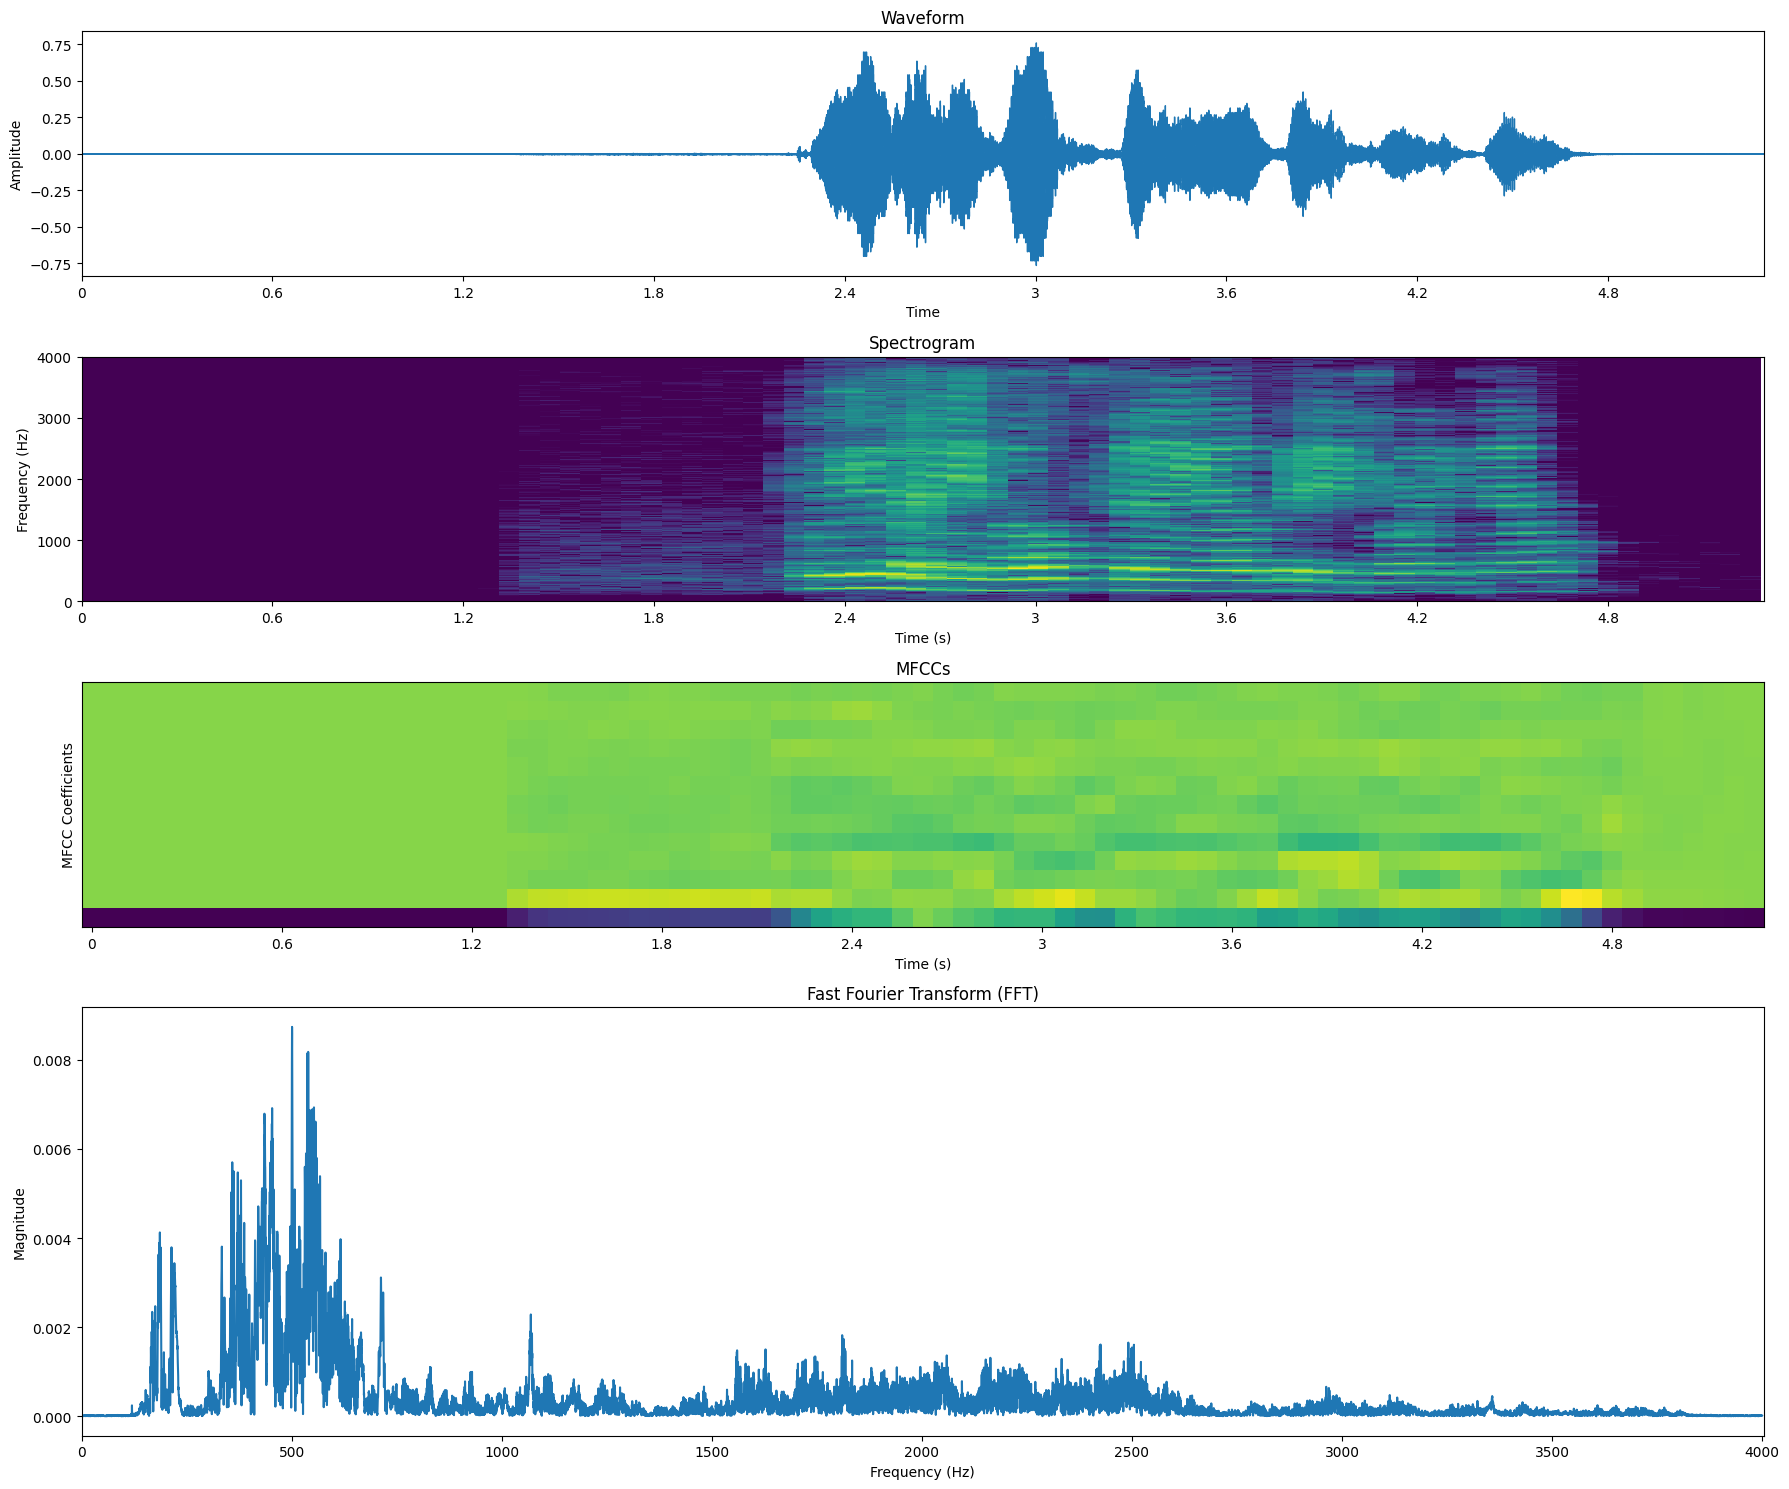

<Figure size 640x480 with 0 Axes>

text script audio: I need help setting up a joint account
intent class: joint_account


In [ ]:
### Sample Data 1

sample_data = minds_en["train"][10]
eda_plots(sample_data)
ipd.Audio(sample_data["audio"]['path'])

### Sample Data 2

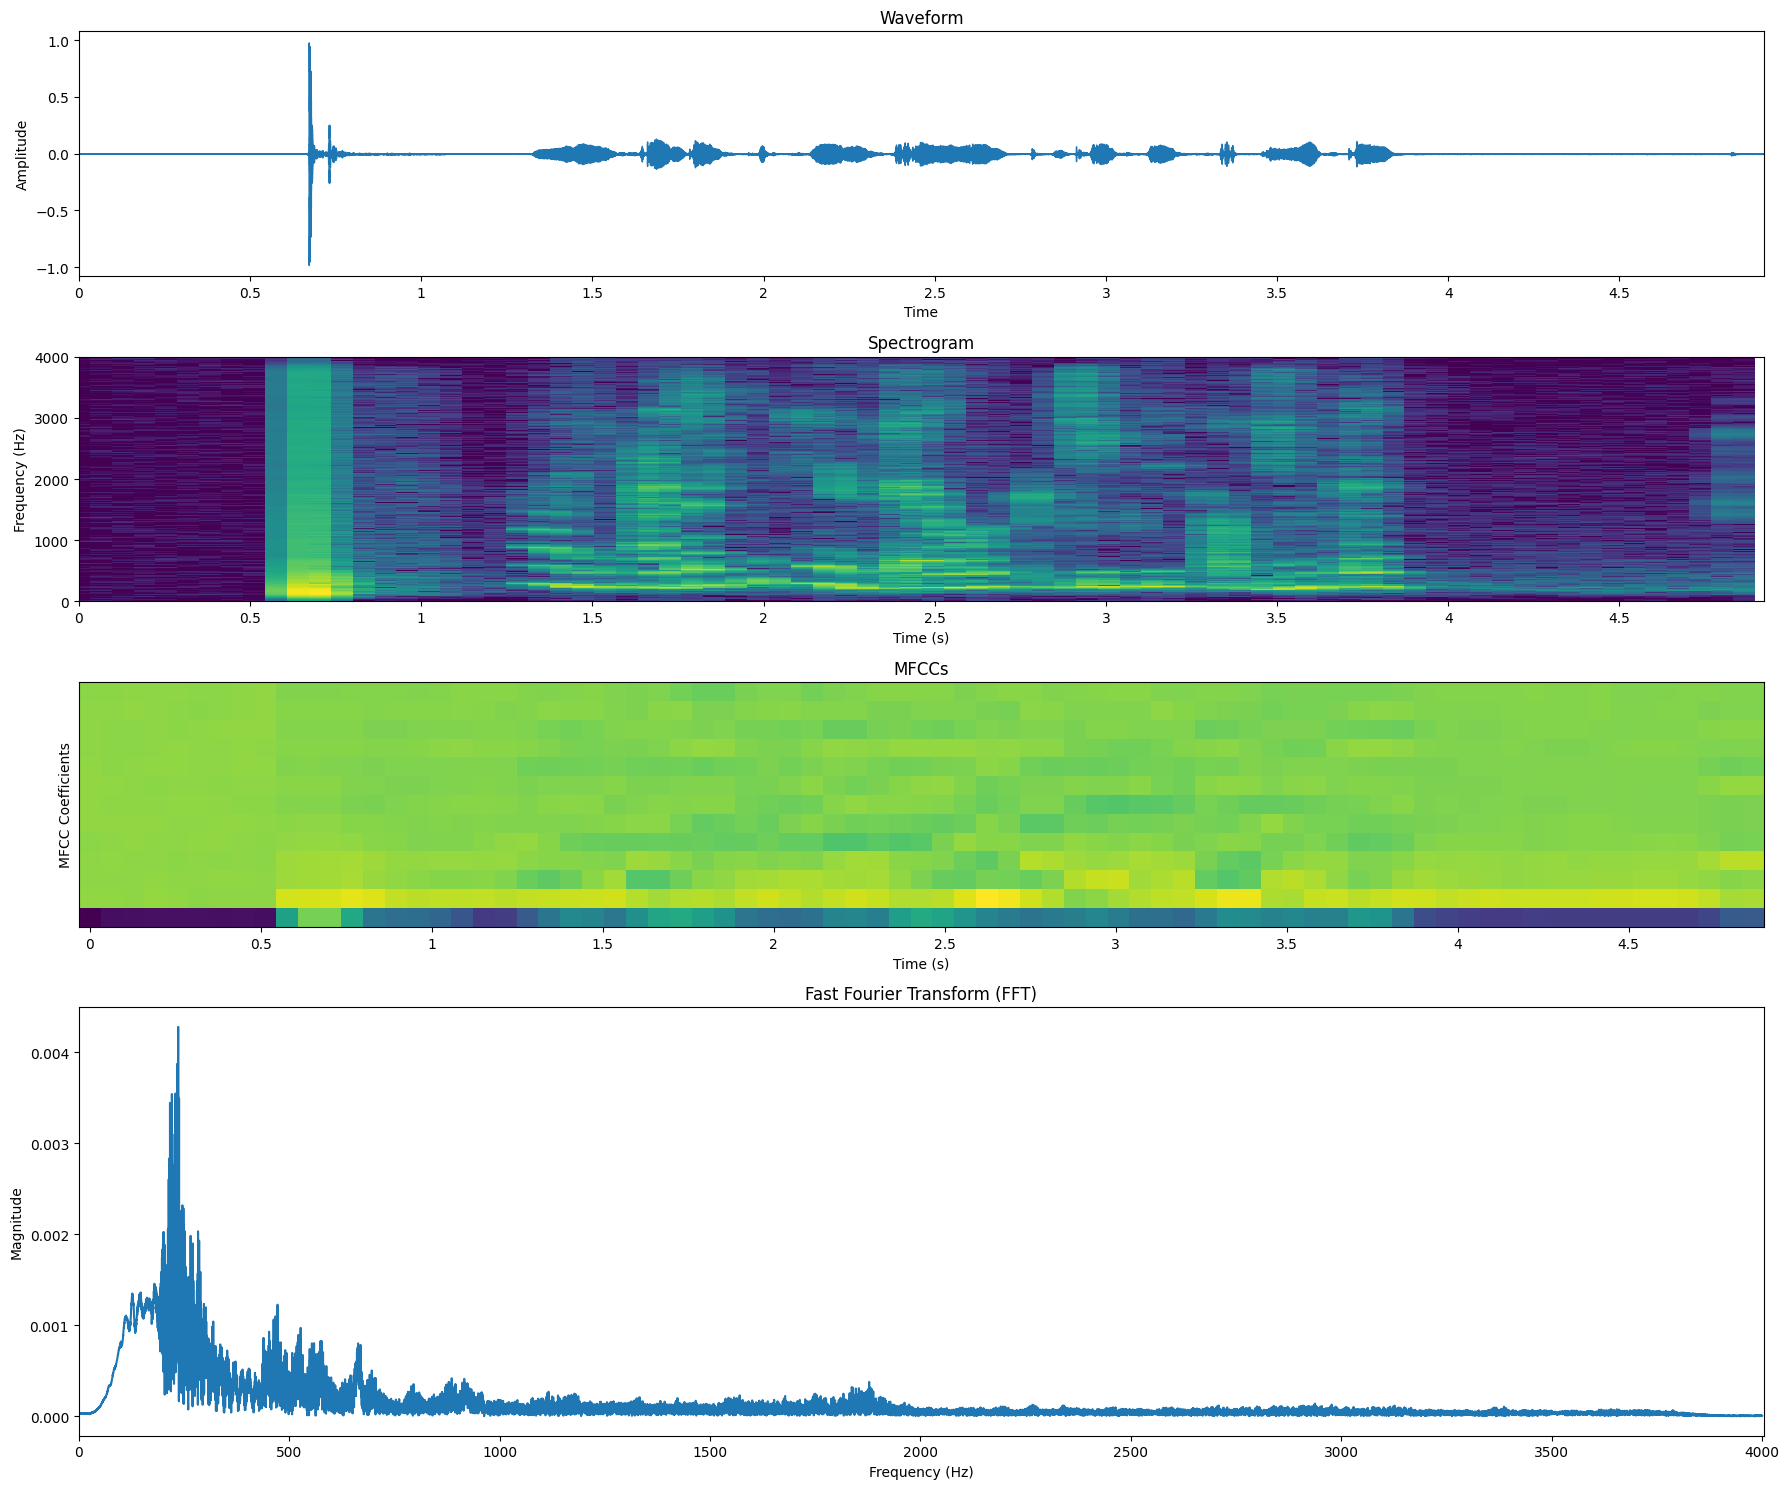

<Figure size 640x480 with 0 Axes>

text script audio: hi I'd like to pay the bills could you please help me with this
intent class: pay_bill


In [ ]:
### Sample Data 2

sample_data = minds_en["train"][99]
eda_plots(sample_data)
ipd.Audio(sample_data["audio"]['path'])

### Sample Data 3

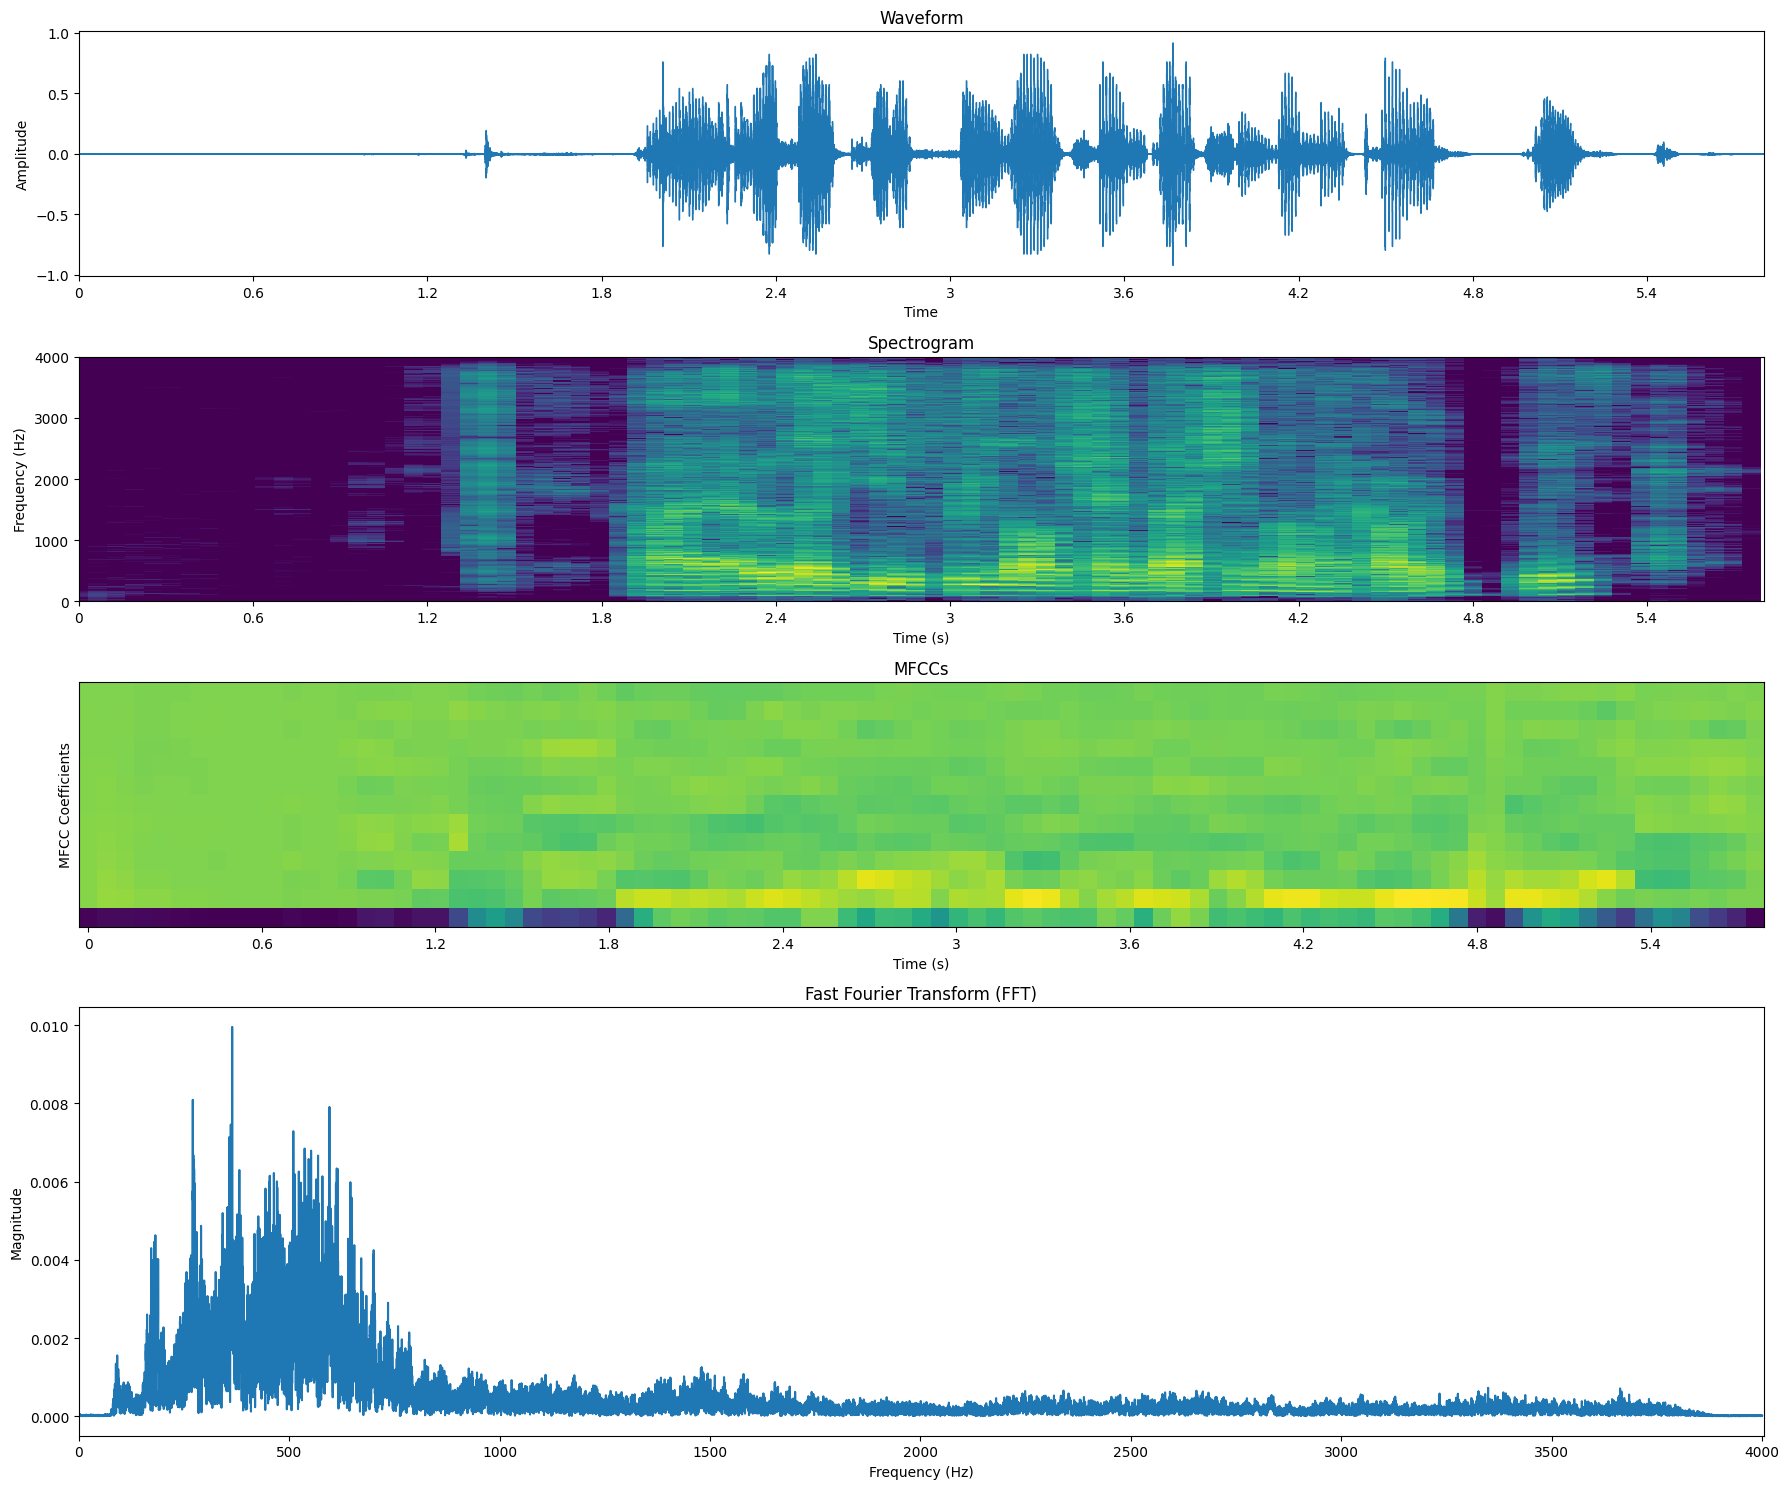

<Figure size 640x480 with 0 Axes>

text script audio: I would like you to freeze all transactions on my card please
intent class: freeze


In [ ]:
### Sample Data 3

sample_data = minds_en["train"][150]
eda_plots(sample_data)
ipd.Audio(sample_data["audio"]['path'])

### Additional Insights

In [ ]:
# convert to format pandas DataFrame
minds_en.set_format(type="pandas")
df = minds_en["train"][:]

intent_names = minds_en["train"].features["intent_class"].names

def mapping_intent(i):
    return intent_names[i]

df["intent_name"] = df["intent_class"].map(mapping_intent)
df["len_transcription"] = df["transcription"].map(len)

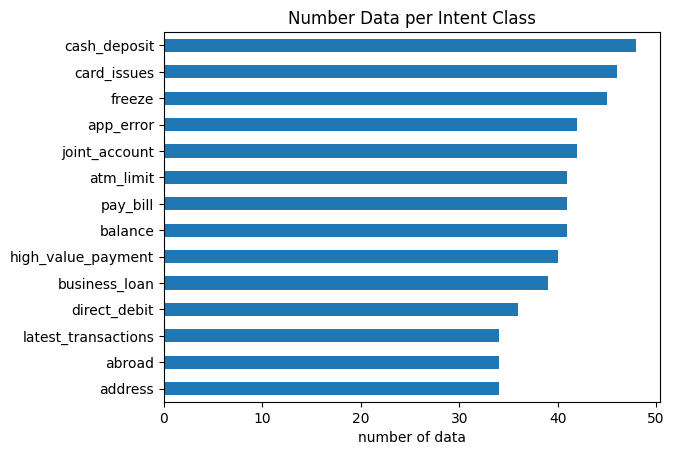

In [ ]:
# number data each intent class
df.intent_name.value_counts().sort_values(ascending=True).plot(kind="barh")
plt.title("Number Data per Intent Class")
plt.xlabel("number of data")
plt.ylabel("")
plt.show()

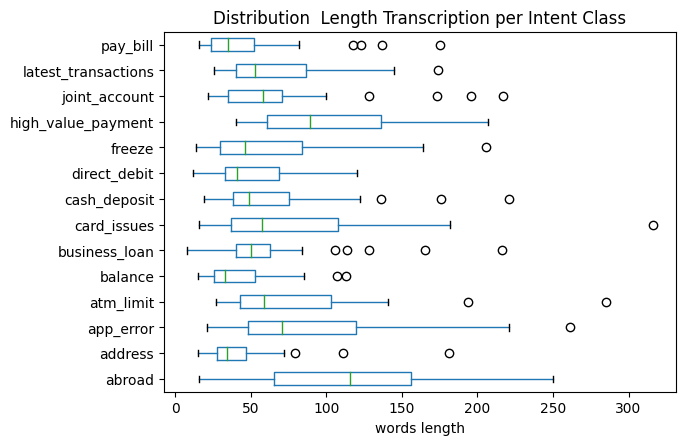

In [ ]:
# distribution len of transcription text per intent class
df.boxplot("len_transcription", by="intent_name", vert=False)
plt.title("Distribution  Length Transcription per Intent Class")
plt.xlabel("words length")
plt.ylabel("")
plt.suptitle("")
plt.grid(False)
# plt.tight_layout()
plt.show()

In [ ]:
# reset to datasets format

minds_en.reset_format()

# Pre-processing

In [ ]:
minds_14 = load_dataset("PolyAI/minds14", name="en-US", split="train[:300]")
# to download all data for multi-lingual fine-tuning uncomment following line
# minds_14 = load_dataset("PolyAI/minds14", "all")

minds = minds_14.train_test_split(test_size=0.2)
minds = minds.remove_columns(["english_transcription", "intent_class", "lang_id"])

In [ ]:
# ## ====================================================================================
# # ## IF using jupyter notebook use this code
# ## ====================================================================================

# autoprocessor = AutoProcessor.from_pretrained("facebook/wav2vec2-base")
# minds = minds.cast_column("audio", Audio(sampling_rate=16_000))
# minds["train"][0]

# def uppercase(example):
#     return {"transcription": example["transcription"].upper()}

# minds = minds.map(uppercase)

# def prepare_dataset(batch, processor = autoprocessor):
#     audio = batch["audio"]
#     batch = processor(audio["array"], sampling_rate=audio["sampling_rate"], text=batch["transcription"])
#     batch["input_length"] = len(batch["input_values"][0])
#     return batch

# encoded_minds = minds.map(prepare_dataset, remove_columns=minds.column_names["train"], num_proc=4)


# ====================================================================================
## IF using google colab you can uncomment and use this part
# ====================================================================================

processor = AutoProcessor.from_pretrained("facebook/wav2vec2-base")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))
minds["train"][0]

def uppercase(example):
    return {"transcription": example["transcription"].upper()}

minds = minds.map(uppercase)

def prepare_dataset(batch):
    audio = batch["audio"]
    batch = processor(audio["array"], sampling_rate=audio["sampling_rate"], text=batch["transcription"])
    batch["input_length"] = len(batch["input_values"][0])
    return batch

encoded_minds = minds.map(prepare_dataset, remove_columns=minds.column_names["train"], num_proc=4)

# Training

In [ ]:
import evaluate

wer_metric = evaluate.load("wer")
cer_metric = evaluate.load("cer")

In [ ]:
# # ====================================================================================
# # ## IF using jupyter notebook use this code
# # ====================================================================================

# def compute_metrics(pred, processor=autoprocessor):
#     pred_logits = pred.predictions
#     pred_ids = np.argmax(pred_logits, axis=-1)

#     pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

#     pred_str = processor.batch_decode(pred_ids)
#     label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

#     wer = wer_metric.compute(predictions=pred_str, references=label_str)

#     return {"wer": wer}


# ====================================================================================
## IF using google colab you can uncomment and use this part
# ====================================================================================

def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = np.argmax(pred_logits, axis=-1)

    pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [ ]:
import torch

from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union


@dataclass
class DataCollatorCTCWithPadding:
    processor: AutoProcessor
    padding: Union[bool, str] = "longest"

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need
        # different padding methods
        input_features = [{"input_values": feature["input_values"][0]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        batch = self.processor.pad(input_features, padding=self.padding, return_tensors="pt")

        labels_batch = self.processor.pad(labels=label_features, padding=self.padding, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        batch["labels"] = labels

        return batch

In [ ]:
# # ====================================================================================
# # ## IF using jupyter notebook use this code
# # ====================================================================================

# data_collator = DataCollatorCTCWithPadding(processor=autoprocessor, padding="longest") # IF jupyter



# ====================================================================================
## IF using google colab you can uncomment and use this part
# ====================================================================================

data_collator = DataCollatorCTCWithPadding(processor=processor, padding="longest")

## WAV2VEC2

In [ ]:
# ## ====================================================================================
# # ## IF using jupyter notebook use this code
# # # ====================================================================================

# from transformers import AutoModelForCTC, TrainingArguments, Trainer

# model = AutoModelForCTC.from_pretrained(
#     "facebook/wav2vec2-base",
#     ctc_loss_reduction="mean",
#     pad_token_id=autoprocessor.tokenizer.pad_token_id,
# )


# ====================================================================================
# IF using google colab you can uncomment and use this part
# ====================================================================================


from transformers import AutoModelForCTC, TrainingArguments, Trainer

model = AutoModelForCTC.from_pretrained(
    "facebook/wav2vec2-base",
    ctc_loss_reduction="mean",
    pad_token_id=processor.tokenizer.pad_token_id,
)

In [ ]:
training_args = TrainingArguments(
    output_dir="asr_mind_model",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    learning_rate=1e-4,
    warmup_steps=500,
    max_steps=3000,
    gradient_checkpointing=True,
    fp16=True,                               # True only use GPU/ CUDA
    group_by_length=True,
    evaluation_strategy="steps",
    save_steps=500,
    eval_steps=500,
    logging_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    # push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_minds["train"],
    eval_dataset=encoded_minds["test"],
    # tokenizer=autoprocessor,                              # IF using jupyter notebook
    tokenizer=processor,                              # IF using google colab
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

In [ ]:
trainer.save_model('asr_mind_wav2vec2_300_max_steps_3000')

In [ ]:
# ###Download the saved model
# # zip file model
# !zip -r /content/asr_mind_wav2vec2_300_max_steps_3000.zip /content/asr_mind_wav2vec2_300_max_steps_3000/

In [ ]:
# from google.colab import files
# # files.download("/content/asr_mind_wav2vec2_300_max_steps_3000.zip")

# Inference

In [ ]:
from scipy import signal
from scipy.io import wavfile
import IPython.display as ipd

from glob import glob
import seaborn as sns
import pandas as pd

import librosa
import librosa.display

import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from transformers import AutoProcessor
from scipy.fft import fft, fftfreq

from transformers import AutoModelForCTC
from transformers import pipeline

In [ ]:
# use unseen data

dataset = load_dataset("PolyAI/minds14", "en-US", split="train[299:350]")
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))
dataset = dataset.map(uppercase)

In [ ]:
# ### cek length char each

# lens = []
# ids = []
# for i in range(len(dataset)):
#   ids.append(i)
#   lens.append(len(dataset[i]["transcription"]))

# pd.DataFrame({
#      'idx':  ids,
#      'len': lens
# })

### Sample 0

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[0]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
# transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_wav2vec2_300_max_steps_3000/") # need directory to config.json file
transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

### Sample 1

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[3]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
# transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_wav2vec2_300_max_steps_3000/") # need directory to config.json file
transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

### Sample 2

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[4]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
# transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_wav2vec2_300_max_steps_3000/") # need directory to config.json file
transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

### Sample 3

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[23]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
# transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_wav2vec2_300_max_steps_3000/") # need directory to config.json file
transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

### Sample 4

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[32]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
# transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_wav2vec2_300_max_steps_3000/") # need directory to config.json file
transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

# Whisper Model Reference

## Preprocessing

In [ ]:
from transformers import WhisperProcessor

whisperProcessor = WhisperProcessor.from_pretrained(
    "openai/whisper-tiny", language="english", task="transcribe"
)

In [ ]:
## Resampling the input data.
from datasets import Audio

sampling_rate = whisperProcessor.feature_extractor.sampling_rate
minds = minds.cast_column("audio", Audio(sampling_rate=sampling_rate))

In [ ]:
## Creating a preprocess function
def prepare_dataset_whisper(example):
    audio = example["audio"]

    example = whisperProcessor(
        audio=audio["array"],
        sampling_rate=audio["sampling_rate"],
        text=example["transcription"],
    )

    # compute input length of audio sample in seconds
    example["input_length"] = len(audio["array"]) / audio["sampling_rate"]

    return example

In [ ]:
minds_encoded = minds.map(
    prepare_dataset_whisper, num_proc=1
)

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [ ]:
minds_encoded["train"] = minds_encoded["train"].filter(
    input_columns=["input_length"],
)

Filter:   0%|          | 0/240 [00:00<?, ? examples/s]

In [ ]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union\


@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [
            {"input_features": feature["input_features"][0]} for feature in features
        ]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(
            labels_batch.attention_mask.ne(1), -100
        )

        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

In [ ]:
##Instantiating the data_collator
data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=whisperProcessor)

In [ ]:
## Downloading the suitable metric
import evaluate

metric = evaluate.load("wer")

In [ ]:
## Defining a function to use the metric
from transformers.models.whisper.english_normalizer import BasicTextNormalizer

normalizer = BasicTextNormalizer()


def compute_metrics_whisper(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # replace -100 with the pad_token_id
    label_ids[label_ids == -100] = whisperProcessor.tokenizer.pad_token_id

    # we do not want to group tokens when computing the metrics
    pred_str = whisperProcessor.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = whisperProcessor.batch_decode(label_ids, skip_special_tokens=True)

    # compute orthographic wer
    wer_ortho = 100 * metric.compute(predictions=pred_str, references=label_str)

    # compute normalised WER
    pred_str_norm = [normalizer(pred) for pred in pred_str]
    label_str_norm = [normalizer(label) for label in label_str]
    # filtering step to only evaluate the samples that correspond to non-zero references:
    pred_str_norm = [
        pred_str_norm[i] for i in range(len(pred_str_norm)) if len(label_str_norm[i]) > 0
    ]
    label_str_norm = [
        label_str_norm[i]
        for i in range(len(label_str_norm))
        if len(label_str_norm[i]) > 0
    ]

    wer = metric.compute(predictions=pred_str_norm, references=label_str_norm)

    return {"wer_ortho": wer_ortho, "wer": wer}

## Training Model

In [ ]:
## Downloading the model
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-tiny")

In [ ]:
## Defining the training goal
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(
    model.generate, language="english", task="transcribe", use_cache=True
)

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./whisper-tiny-minds14",  # name on the HF Hub
    per_device_train_batch_size=32,
    gradient_accumulation_steps=2,  # increase by 2x for every 2x decrease in batch size
    learning_rate=1e-5,
    lr_scheduler_type="constant_with_warmup",
    warmup_steps=50,
    max_steps=1000,  # increase to 4000 if you have your own GPU or a Colab paid plan
    gradient_checkpointing=True,
    fp16=True,
    fp16_full_eval=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=500,
    eval_steps=500,
    logging_steps=25,
    #report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=True,
)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=minds_encoded["train"],
    eval_dataset=minds_encoded["test"],
    data_collator=data_collator,
    compute_metrics=compute_metrics_whisper,
    tokenizer=whisperProcessor,
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Wer Ortho,Wer
500,0.000200,0.692476,28.761062,0.284958
1000,0.000100,0.745204,29.092920,0.289195


TrainOutput(global_step=1000, training_loss=0.13933049539430067, metrics={'train_runtime': 9621.8844, 'train_samples_per_second': 6.652, 'train_steps_per_second': 0.104, 'total_flos': 1.4771331072e+18, 'train_loss': 0.13933049539430067, 'epoch': 250.0})

## Evaluate Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/asr_mind_whisper_300_max_steps_3000.zip"
torch.save(model.state_dict(), path)

In [ ]:
trainer.save_model('./content/asr_mind_whisper_300_max_steps_3000')

In [ ]:
def uppercase(example):
    return {"transcription": example["transcription"].upper()}

dataset = load_dataset("PolyAI/minds14", "en-US", split="train[299:350]")
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))
dataset = dataset.map(uppercase)

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[0]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

transcription: HI I'M GOING TO BE GOING ABROAD AND I'D LIKE TO KNOW IF I CAN USE MY CARD IN ENGLAND WHILE I'M THERE AND WORK IF I HAVE TO DO ANYTHING SPECIAL TO ACTIVATE IT
intent class: abroad


In [ ]:
#Sample 1

In [ ]:
from transformers import pipeline
# transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_wav2vec2_300_max_steps_3000/") # need directory to config.json file
transcriber = pipeline("automatic-speech-recognition", model="./content/asr_mind_whisper_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text'].upper()



In [ ]:
print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

transcription referece:
HI I'M GOING TO BE GOING ABROAD AND I'D LIKE TO KNOW IF I CAN USE MY CARD IN ENGLAND WHILE I'M THERE AND WORK IF I HAVE TO DO ANYTHING SPECIAL TO ACTIVATE IT
transcription prediction:
HI I'M GOING TO BE GOING ABROAD AND I'D LIKE TO KNOW IF I CAN USE MY CARD IN ENGLAND WHILE I'M THERE AND WORK IF I HAVE TO DO ANYTHING SPECIAL TO ACTIVATE IT


In [ ]:
import evaluate

wer_metric = evaluate.load("wer")
cer_metric = evaluate.load("cer")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])


In [ ]:
print(f"WER: {wer_score:.4f}")
print(f"CER: {cer_score:.4f}")

WER: 0.0000
CER: 0.0000


In [ ]:
# Sample 2, ( sample 4 in wave2vec)

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[32]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

transcription: HOW DO I SET UP A DIRECT DEBIT
intent class: direct_debit


In [ ]:
# transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_wav2vec2_300_max_steps_3000/") # need directory to config.json file
transcriber = pipeline("automatic-speech-recognition", model="./content/asr_mind_whisper_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text'].upper()


In [ ]:
print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

transcription referece:
HOW DO I SET UP A DIRECT DEBIT
transcription prediction:
HOW DO I SET UP A DIRECT APP AT


In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])

In [ ]:
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

WER:0.25
CER:0.17


# Hubbert Model Reference

In [ ]:
processor = AutoProcessor.from_pretrained("facebook/hubert-large-ls960-ft")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))
minds["train"][0]

def uppercase(example):
    return {"transcription": example["transcription"].upper()}

minds = minds.map(uppercase)

def prepare_dataset(batch):
    audio = batch["audio"]
    batch = processor(audio["array"], sampling_rate=audio["sampling_rate"], text=batch["transcription"])
    batch["input_length"] = len(batch["input_values"][0])
    return batch

encoded_minds = minds.map(prepare_dataset, remove_columns=minds.column_names["train"], num_proc=4)

# Training

In [ ]:
import evaluate

wer_metric = evaluate.load("wer")
cer_metric = evaluate.load("cer")

In [ ]:
# # ====================================================================================
# # ## IF using jupyter notebook use this code
# # ====================================================================================

#def compute_metrics(pred, processor=autoprocessor):
    #pred_logits = pred.predictions
    #pred_ids = np.argmax(pred_logits, axis=-1)

    #pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    #pred_str = processor.batch_decode(pred_ids)
    #label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    #wer = wer_metric.compute(predictions=pred_str, references=label_str)

    #return {"wer": wer}


# ====================================================================================
## IF using google colab you can uncomment and use this part
# ====================================================================================

def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = np.argmax(pred_logits, axis=-1)

    pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [ ]:
import torch

from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union


@dataclass
class DataCollatorCTCWithPadding:
    processor: AutoProcessor
    padding: Union[bool, str] = "longest"

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need
        # different padding methods
        input_features = [{"input_values": feature["input_values"][0]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        batch = self.processor.pad(input_features, padding=self.padding, return_tensors="pt")

        labels_batch = self.processor.pad(labels=label_features, padding=self.padding, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        batch["labels"] = labels

        return batch

In [ ]:
## ## ====================================================================================
# # ## IF using jupyter notebook use this code
# # # ====================================================================================

from transformers import AutoModelForCTC, TrainingArguments, Trainer

#model = AutoModelForCTC.from_pretrained(
    #"facebook/hubert-large-ls960-ft",
    #ctc_loss_reduction="mean",
    #pad_token_id=autoprocessor.tokenizer.pad_token_id,
    #)


# ====================================================================================
# IF using google colab you can uncomment and use this part
# ====================================================================================


from transformers import AutoModelForCTC, TrainingArguments, Trainer


model = AutoModelForCTC.from_pretrained(
    "facebook/hubert-large-ls960-ft",
    ctc_loss_reduction="mean",
    pad_token_id=processor.tokenizer.pad_token_id,
)

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

In [ ]:
training_args = TrainingArguments(
    output_dir="asr_mind_model",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=2,
    learning_rate=1e-4,
    warmup_steps=500,
    max_steps=3000,
    gradient_checkpointing=True,
    fp16=True,                               # True only use GPU/ CUDA
    group_by_length=True,
    evaluation_strategy="steps",
    save_steps=500,
    eval_steps=500,
    logging_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    num_train_epochs=100,
    # push_to_hub=True,

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_minds["train"],
    eval_dataset=encoded_minds["test"],
    #tokenizer=autoprocessor,                              # IF using jupyter notebook
    tokenizer=processor,                              # IF using google colab
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

In [ ]:
trainer.save_model('asr_mind_hubertLargels960_300_max_steps_3000')

In [ ]:
##Download the saved model
!zip -r /content/asr_mind_hubertLargels960_300_max_steps_3000.zip /content/asr_mind_hubertLargels960_300_max_steps_3000/

In [ ]:
from google.colab import files
files.download("/content/asr_mind_hubertLargels960_300_max_steps_3000.zip")

## Sample 0

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[0]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_hubertLargels960_300_max_steps_3000") # need directory to config.json file
#transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

# Sample 1

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[3]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_hubertLargels960_300_max_steps_3000") # need directory to config.json file
#transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

## Sample 2

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[4]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_hubertLargels960_300_max_steps_3000") # need directory to config.json file
#transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

## Sample 3

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[23]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_hubertLargels960_300_max_steps_3000") # need directory to config.json file
#transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

## Sample 4

In [ ]:
sampling_rate = dataset.features["audio"].sampling_rate
audio_sample = dataset[32]
audio_text = audio_sample["transcription"]
audio_file = audio_sample["audio"]["path"]
print(f"transcription: {audio_text}")
print(f'intent class: {dataset.features["intent_class"].names[audio_sample["intent_class"]]}')

ipd.Audio(audio_file)

In [ ]:
transcriber = pipeline("automatic-speech-recognition", model="/content/asr_mind_hubertLargels960_300_max_steps_3000") # need directory to config.json file
#transcriber = pipeline("automatic-speech-recognition", model="./saved_models/asr_mind_wav2vec2_300_max_steps_3000") # need directory to config.json file
reference = audio_text
predicted =  transcriber(audio_file)['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

In [ ]:
# CER & WER score
wer_score = wer_metric.compute(predictions = [predicted], references = [reference])
cer_score = cer_metric.compute(predictions = [predicted], references = [reference])
print(f"WER:{round(wer_score, 2)}")
print(f"CER:{round(cer_score, 2)}")

# Recommendations
- Some transcriptions from the dataset are not accurate, need to review in depth
- Remove the background noises
- Fine-tune the model on larger data

# Appendix


## Metric evaluation
#### WER (Word Error Rate)

`WER = (S+I+D)/N`


Detail:
- S = Subsitution
- I = Insertion
- D = Deletion
- N = Number of words in the reference transcript


**WER drawbacks**
1. There is no differentiation between the words that are essential to the meaning of the sentence and those that are not as important.
2. It doesn’t take into consideration if two words differ just by one character or if they differ completely (alternatively use CER)

**What causes speech-to-text transcription errors?**
1. Accents and variations in rate of speech
2. Homophones, homographs and homonyms
3. Crosstalk aka overlapping dialogue
4. Audio quality and background noise
5. Acronyms and industry-specific jargon


**How to improve ASR?**
1. Use high-quality headset microphone that holds the microphone in a consistent position directly in front of your mouth
2. Eliminate echoes and noises

# References
- MInDS-14 Dataset:
    - Paper: [Multilingual and Cross-Lingual Detection from Spoken Data](https://arxiv.org/abs/2104.08524)
    - https://huggingface.co/datasets/PolyAI/minds14
- wav2vec2 model:
    - Paper: [wav2vec 2.0: A Framework for Self-Supervised Learning of Speech Representations](https://arxiv.org/abs/2006.11477)
- Automatic Speech Recognition - Hugging Face:
    - https://huggingface.co/tasks/automatic-speech-recognition
- WER metric:
    - https://medium.com/@bethworthy/what-is-word-error-rate-measuring-the-wer-of-machine-generated-transcripts-and-its-limitations-1457be914f3b
    - https://medium.com/nlplanet/two-minutes-nlp-intro-to-word-error-rate-wer-for-speech-to-text-fc17a98003ea#:~:text=Basically%2C%20WER%20is%20the%20number,words%20in%20the%20reference%20transcript.&text=Lower%20WER%20often%20indicates%20that,often%20indicates%20lower%20ASR%20accuracy.
    - https://www.clari.com/blog/word-error-rate/#:~:text=What%20is%20Word%20Error%20Rate,the%20transcript%20is%2080%25%20accurate.
    - https://www.journalofaccountancy.com/issues/2019/jan/voice-recognition-accuracy.html#:~:text=Eliminate%20echoes%20and%20noises.,computer's%20ability%20to%20understand%20you.
- Error ffmpeg file not found during inference (for Windows users):
    - https://discuss.huggingface.co/t/audio-classification-pipeline-valueerror-ffmpeg-was-not-found-but-is-required-to-load-audio-files-from-filename/16137
    - https://ffmpeg.org/download.html
    - https://www.youtube.com/watch?v=jZLqNocSQDM
    - type command `choco install ffmpeg` in powershell (run as Administrator)